# Praxisübung: Eigengesichter

Das Ziel der Aufgabe ist es, für ein Datenset mit vielen Features eine Dimensionsreduktion mittels PCA durchzuführen. Für die reduzierte Darstellung soll ein Klassifikator trainiert werden. Bei den Daten handelt es sich um das Olivetti Faces Datenset (Teil von scikit-learn). Ausführen der Zellen unten lädt die Daten herunter, spaltet in Trainings- und Testset auf und zeigt einige der 400 Bilder an. Zu sehen sind Porträts von insgesamt 40 Personen, wobei für jede 10 Porträts existieren. Das Ziel des Klassifikators ist, jedes Bild einer der 40 Personen (Klassen) zuzuordnen.

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

faces = datasets.fetch_olivetti_faces()

# 40 Personen, 10 Bilder pro Person = 400 Bilder
# Eine Zeile = 1 Bild (64 x 64 = 4096 Pixel = Anzahl Features). 
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


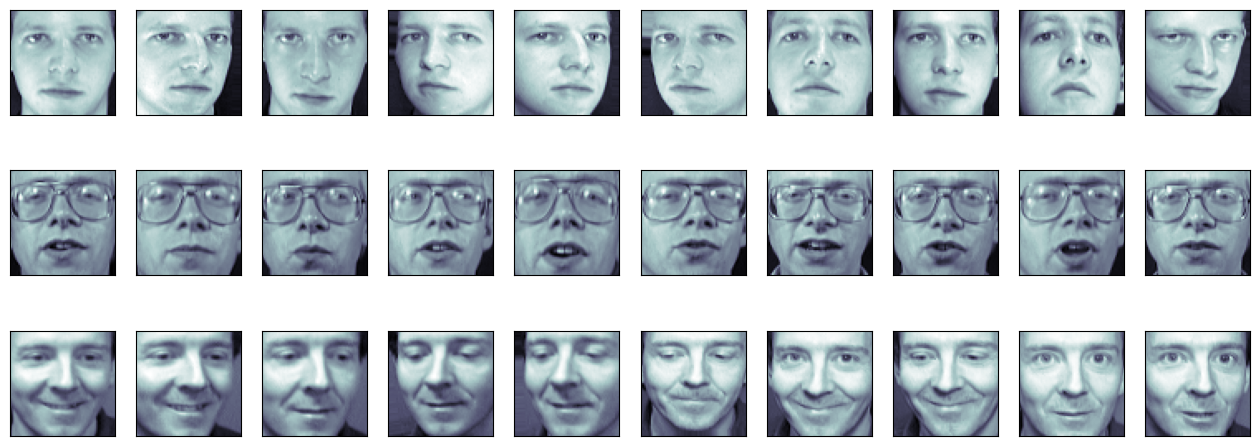

In [12]:
import matplotlib.pyplot as plt

# Plotten einiger Bilder (die Zeilen der Datenmatrix faces.data sind unter faces.images als Matrizen verfügbar.
fig = plt.figure(figsize=(16, 8))
show_n_images = 30
for i in range(show_n_images):
    ax = fig.add_subplot(show_n_images//10+1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

## Skalierung und Training

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

U, S, VT = np.linalg.svd(X_train)

# Matrizen
print(U.shape, S.shape, VT.shape)

(300, 300) (300,) (4096, 4096)


## Visualisierung von Eigengesichtern

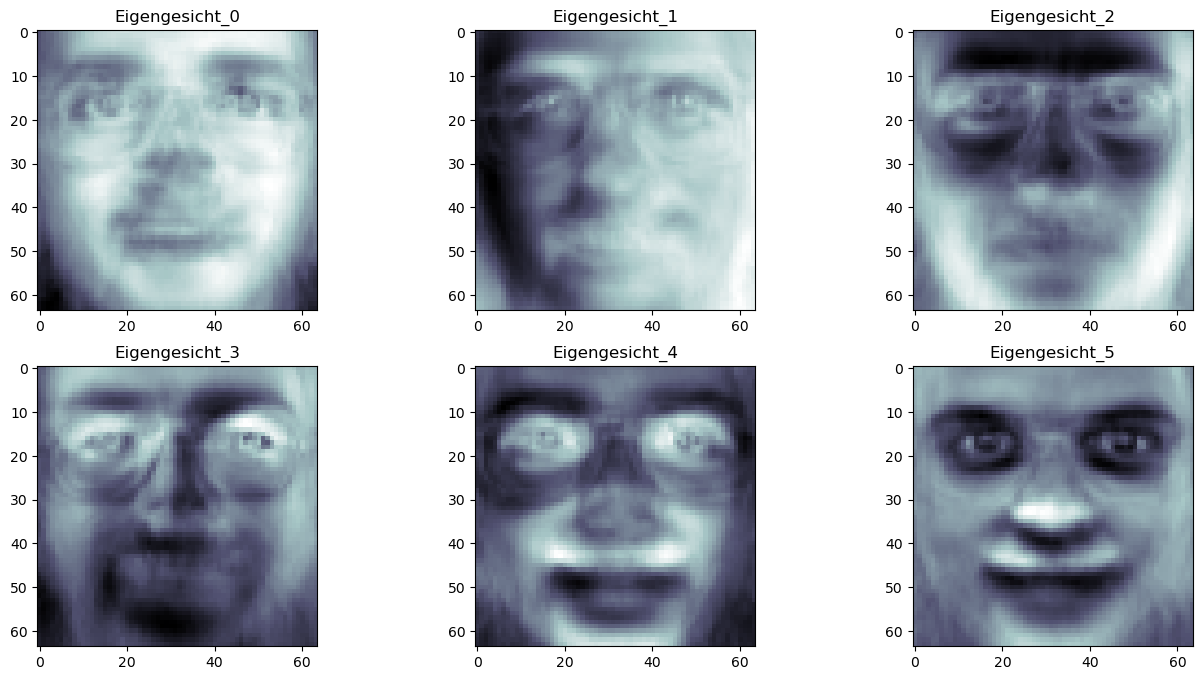

In [16]:
# Eigengesichter = Eigenvektoren: Zeilen von V^T
plt.figure(figsize = (16, 8))

for i, k in enumerate(range(6)):
    eigenface = (VT[k:k+1,:]).reshape(64,64)
    plt.subplot(2, 3, i+1)
    plt.imshow(eigenface, cmap = "bone")
    plt.title(f"Eigengesicht_{i}")

## Visualisierung von Rekonstruktionen

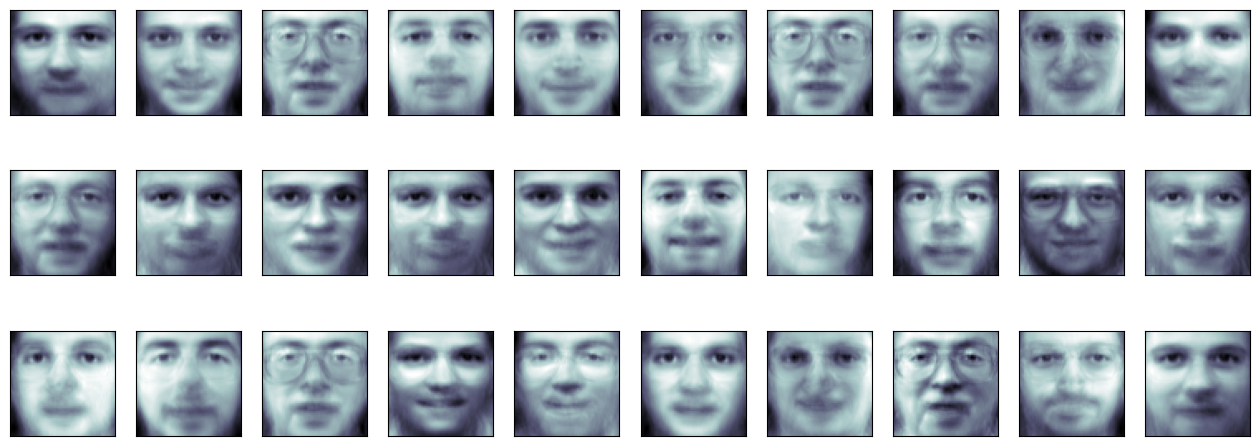

In [24]:
# Plotten einiger rekonstruierter Bilder aus dem Trainingsset
# Mit wie vielen Komponenten bekommt man theoretisch eine perfekte Rekonstruktion aus dem Trainingsset? 
# Kann man auch eine perfekte Rekonstruktion für das Testset erhalten? Wenn ja, wie viele Komponenten bräuchte man dafür?
n_components = 10

X_train_low_dim = X_train @ VT[:n_components,:].T
X_tilde_train = X_train_low_dim @ VT[:n_components,:] * np.sqrt(scale.var_) + scale.mean_

fig = plt.figure(figsize=(16, 8))
show_n_images = 30
for i in range(show_n_images):
    ax = fig.add_subplot(show_n_images//10+1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow((X_tilde_train[i,:] ).reshape(64,64), cmap=plt.cm.bone)

## Plot der erklärten Varianz

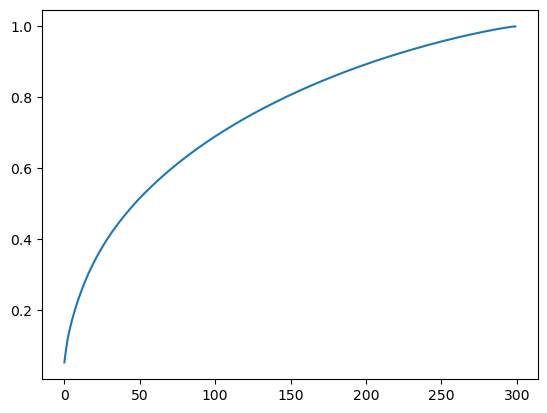

In [23]:
plt.plot(S.cumsum()/S.sum())

## Aufgaben
1. Trainieren Sie ein Klassifikationsmodell auf den Originaldaten. Berechnen Sie die Accuracy auf den Trainings- und Testdaten.
2.  Trainieren Sie mehrere Klassifikationsmodelle auf den reduzierten Daten für unterschiedliche reduzierte Dimensionen. Berechnen Sie jeweils die Accuracy auf den Trainings- und Testdaten und visualisieren Sie sie in Abhängigkeit von der gewählten reduzierten Dimension. Vergleichen Sie mit dem Modell aus Aufgabe 1.